In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# Import data
data = pd.read_csv("../CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.drop(["CUST_ID"], axis = 1, inplace = True)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
print (data.shape)
print (data.dtypes)

(8950, 17)
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


There's no any categorical column

In [5]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
data.std()

BALANCE                             2081.531879
BALANCE_FREQUENCY                      0.236904
PURCHASES                           2136.634782
ONEOFF_PURCHASES                    1659.887917
INSTALLMENTS_PURCHASES               904.338115
CASH_ADVANCE                        2097.163877
PURCHASES_FREQUENCY                    0.401371
ONEOFF_PURCHASES_FREQUENCY             0.298336
PURCHASES_INSTALLMENTS_FREQUENCY       0.397448
CASH_ADVANCE_FREQUENCY                 0.200121
CASH_ADVANCE_TRX                       6.824647
PURCHASES_TRX                         24.857649
CREDIT_LIMIT                        3638.815725
PAYMENTS                            2895.063757
MINIMUM_PAYMENTS                    2372.446607
PRC_FULL_PAYMENT                       0.292499
TENURE                                 1.338331
dtype: float64

In [7]:
# Missing values
print (data.isnull().sum())

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


Only two columns have missing values

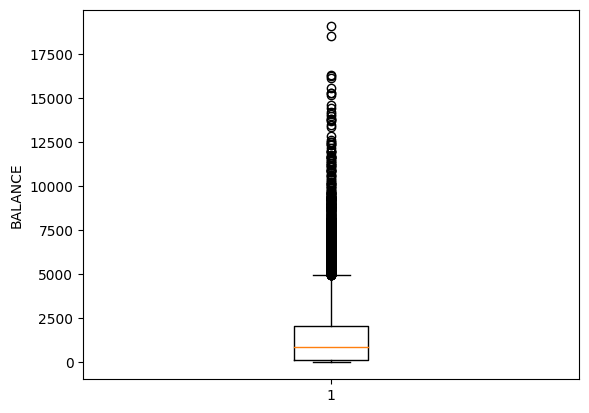

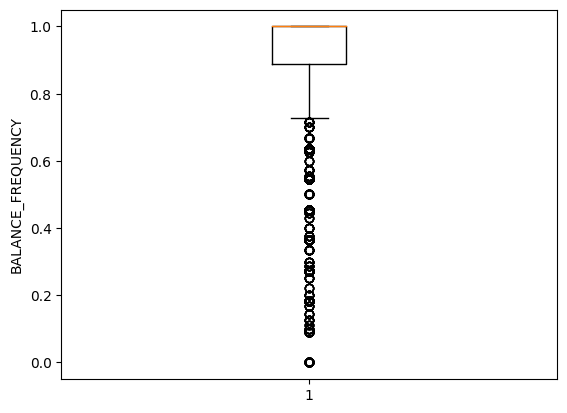

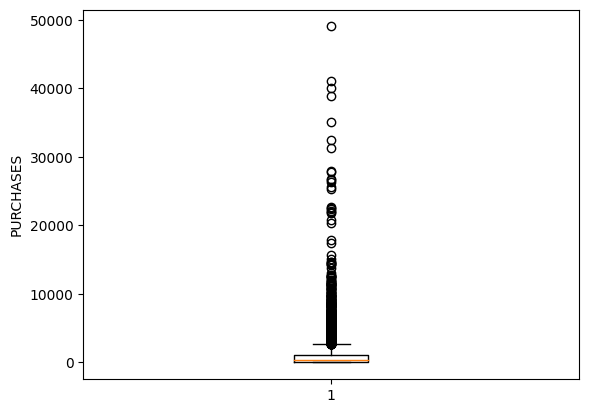

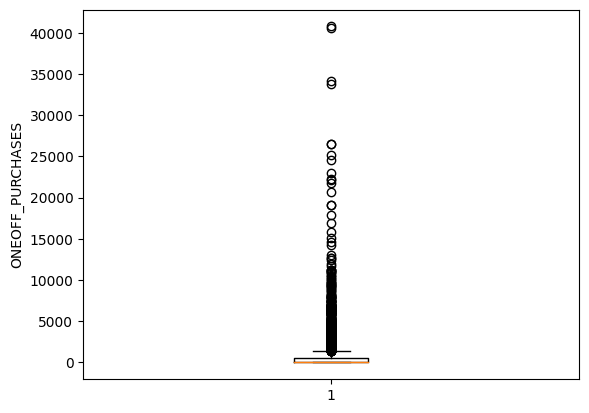

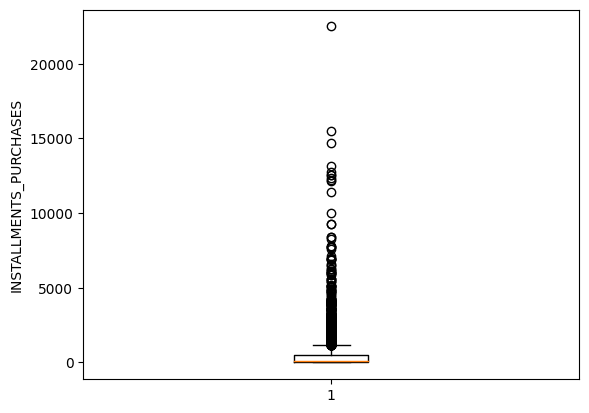

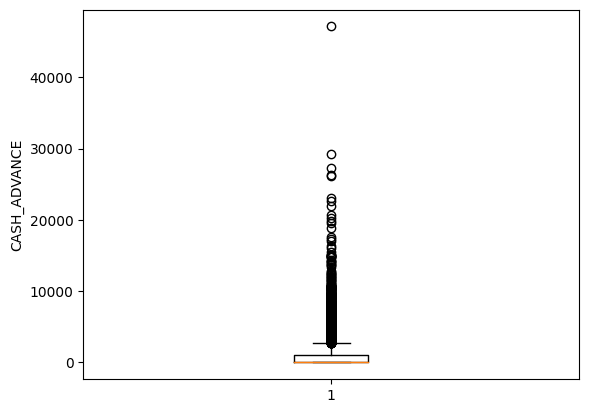

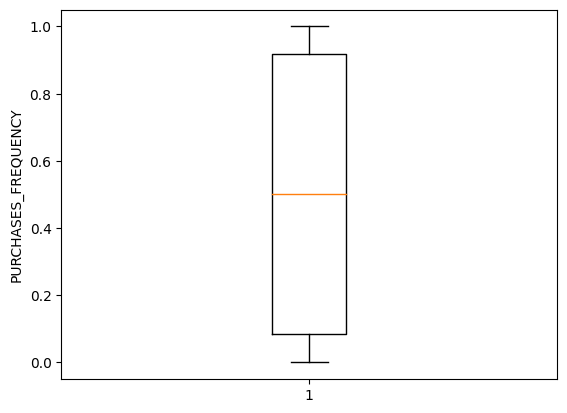

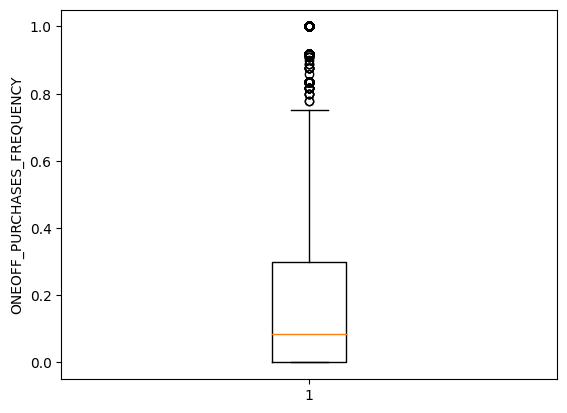

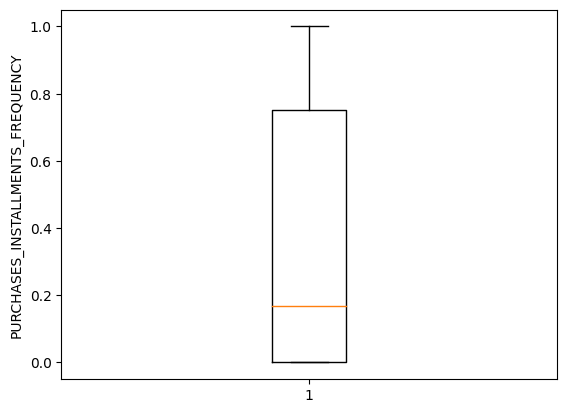

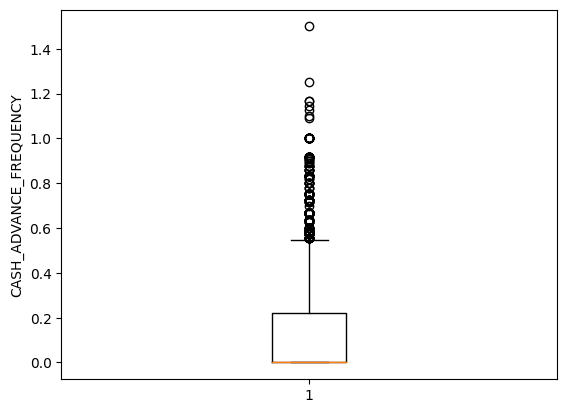

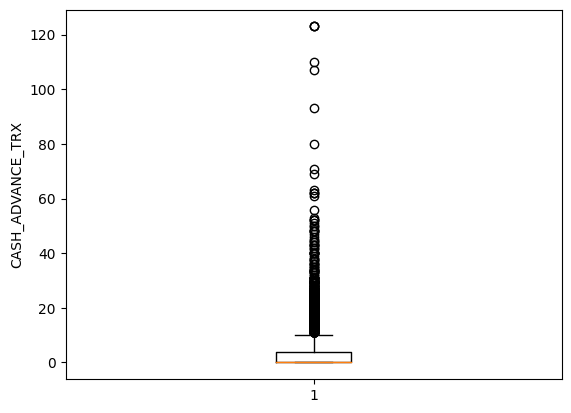

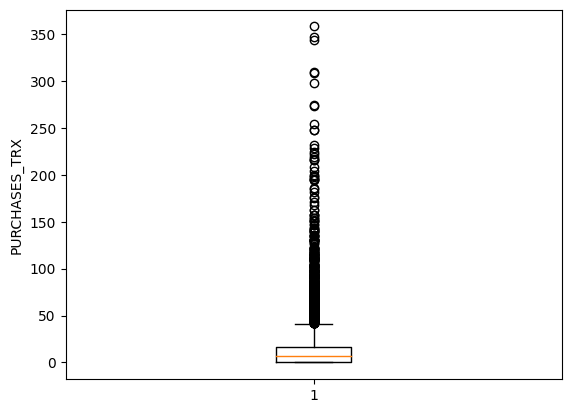

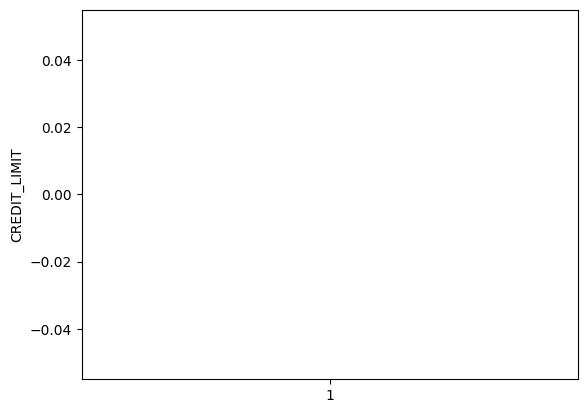

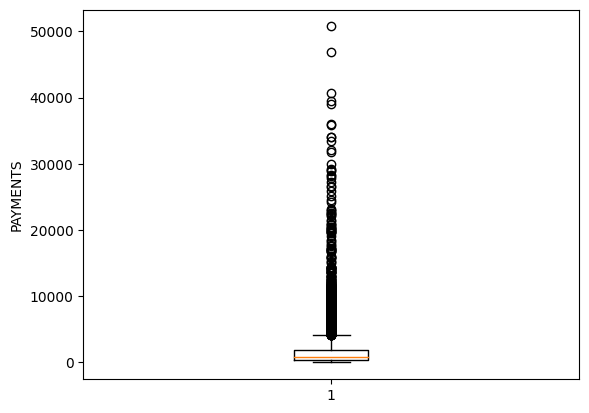

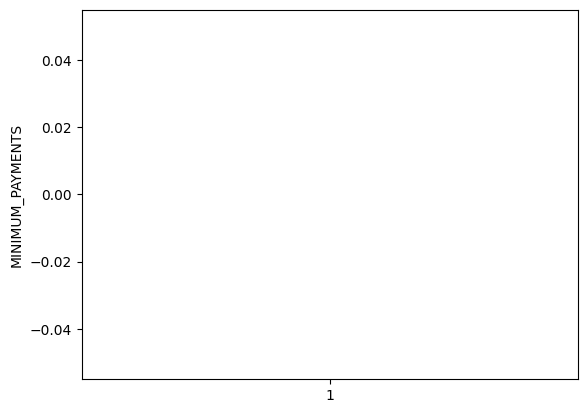

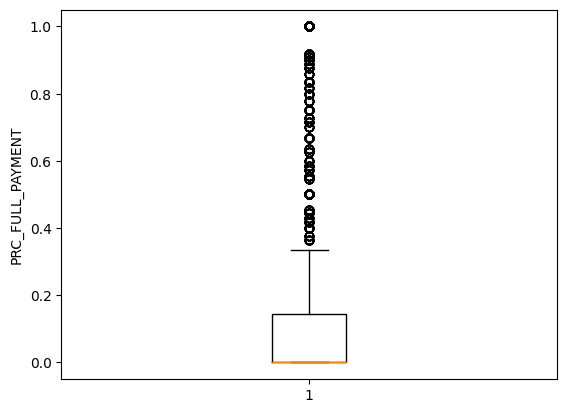

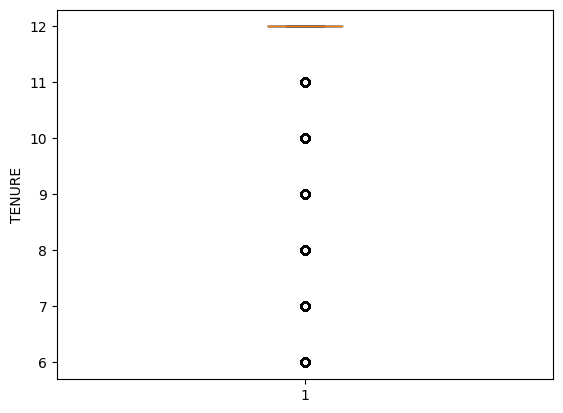

In [8]:
# Outliers
for col in data.columns:
    plt.boxplot(data[col].values)
    plt.ylabel(col)
    plt.show()

In [9]:
def find_outliers(col: pd.DataFrame):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    IQR_outliers = col[((col < (Q1 - 1.5 * IQR)) | (col > (Q3 + 1.5 * IQR)))]
    return (IQR_outliers)

In [10]:
o_rows: set = set()
for col in data.columns:
    print (f"{col:35}: {find_outliers(data[col]).shape[0] / data.shape[0]}")
    outliers = find_outliers(data[col])
    if (outliers.shape[0] / data.shape[0]) < 0.1:
        for v in list(outliers.index): o_rows.add(v)

wo_data = data.drop(list(o_rows), axis = 0)
print (len(o_rows), data.shape[0])

BALANCE                            : 0.0776536312849162
BALANCE_FREQUENCY                  : 0.16681564245810057
PURCHASES                          : 0.09027932960893854
ONEOFF_PURCHASES                   : 0.11318435754189944
INSTALLMENTS_PURCHASES             : 0.09687150837988827
CASH_ADVANCE                       : 0.11508379888268157
PURCHASES_FREQUENCY                : 0.0
ONEOFF_PURCHASES_FREQUENCY         : 0.08737430167597765
PURCHASES_INSTALLMENTS_FREQUENCY   : 0.0
CASH_ADVANCE_FREQUENCY             : 0.05865921787709497
CASH_ADVANCE_TRX                   : 0.08983240223463687
PURCHASES_TRX                      : 0.08558659217877095
CREDIT_LIMIT                       : 0.02770949720670391
PAYMENTS                           : 0.09027932960893854
MINIMUM_PAYMENTS                   : 0.09396648044692738
PRC_FULL_PAYMENT                   : 0.1646927374301676
TENURE                             : 0.15262569832402234
3300 8950


some columns have a lot of outliers and we should keep them becuase without them our data will be too small

In [11]:
# Standardize
scaler = StandardScaler()
wo_scaler = StandardScaler()

In [12]:
scaler.fit(data.values)
wo_scaler.fit(wo_data.values)

StandardScaler()

In [13]:
data = pd.DataFrame(scaler.transform(data.values)\
                    , columns=data.columns)
wo_data = pd.DataFrame(wo_scaler.transform(wo_data.values)\
                       , columns=wo_data.columns)

In [14]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.949000e+03,8.950000e+03,8.637000e+03,8.950000e+03,8.950000e+03
mean,-2.540488e-17,1.587805e-16,3.175610e-18,-6.033659e-17,3.175610e-17,-6.351220e-18,9.328354e-17,1.905366e-17,5.716098e-17,-1.595744e-16,-1.746585e-17,-1.905366e-17,1.905579e-16,-2.540488e-17,-2.797088e-17,-9.526830e-18,2.921561e-16
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000058e+00,1.000056e+00,1.000056e+00
min,-7.516398e-01,-3.703271e+00,-4.695519e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.221758e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.917959e-01,-1.221468e+00,-5.986883e-01,-3.642811e-01,-5.255510e-01,-4.122768e+00
25%,-6.900078e-01,4.904486e-02,-4.510006e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.014125e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.515646e-01,-7.954817e-01,-4.662913e-01,-2.929984e-01,-5.255510e-01,3.606795e-01
50%,-3.320286e-01,5.180838e-01,-3.004541e-01,-3.340396e-01,-3.561562e-01,-4.667856e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-6.753489e-01,-4.760698e-01,-3.101767e-01,-4.107196e-01,-3.026846e-01,-2.326268e-01,-5.255510e-01,3.606795e-01
75%,2.352559e-01,5.180838e-01,5.004652e-02,-9.056763e-03,6.366321e-02,6.435242e-02,1.062211e+00,3.269728e-01,9.701506e-01,4.351492e-01,1.100739e-01,9.213645e-02,5.511855e-01,5.802976e-02,-1.632211e-02,-3.712234e-02,3.606795e-01
max,8.397489e+00,5.180838e-01,2.248351e+01,2.420107e+01,2.442689e+01,2.201112e+01,1.269843e+00,2.673451e+00,1.599199e+00,6.820521e+00,1.754785e+01,1.381101e+01,7.009692e+00,1.692228e+01,3.184323e+01,2.893453e+00,3.606795e-01


In [15]:
wo_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,5.650000e+03,5.650000e+03,5.650000e+03,5.650000e+03,5.650000e+03,5.650000e+03,5.650000e+03,5.650000e+03,5.650000e+03,5.650000e+03,5.650000e+03,5.650000e+03,5.649000e+03,5.650000e+03,5.383000e+03,5.650000e+03,5.650000e+03
mean,-4.024313e-17,-2.313980e-16,-3.521274e-17,-1.509117e-17,3.521274e-17,-2.766715e-17,1.861245e-16,1.006078e-17,-5.030391e-17,2.766715e-17,-2.200796e-17,-2.389436e-17,-2.415015e-16,1.207294e-16,1.161578e-16,3.018235e-17,-4.728568e-16
std,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000093e+00,1.000089e+00,1.000089e+00
min,-8.504075e-01,-3.111455e+00,-8.171550e-01,-5.296670e-01,-7.189618e-01,-5.013169e-01,-1.110580e+00,-6.288654e-01,-8.518144e-01,-6.961100e-01,-6.420096e-01,-8.908268e-01,-1.256309e+00,-1.037989e+00,-1.086979e+00,-5.064362e-01,-3.754973e+00
25%,-7.970834e-01,-4.010724e-01,-7.856268e-01,-5.296670e-01,-7.189618e-01,-5.013169e-01,-8.864315e-01,-6.288654e-01,-8.518144e-01,-6.961100e-01,-6.420096e-01,-7.714073e-01,-7.139874e-01,-6.618449e-01,-6.566475e-01,-5.064362e-01,3.946419e-01
50%,-3.900838e-01,6.153198e-01,-3.446904e-01,-5.296670e-01,-5.105364e-01,-5.013169e-01,-2.139818e-01,-6.288654e-01,-6.078666e-01,-6.961100e-01,-6.420096e-01,-2.937296e-01,-3.122678e-01,-3.076660e-01,-4.404753e-01,-5.064362e-01,3.946419e-01
75%,4.656690e-01,6.153198e-01,3.559900e-01,5.973636e-02,4.580712e-01,6.337159e-02,9.067686e-01,3.327928e-01,9.371392e-01,6.380229e-01,2.037246e-01,5.422065e-01,4.108273e-01,2.996933e-01,3.732172e-01,-1.097146e-01,3.946419e-01
max,3.913447e+00,6.153198e-01,4.476584e+00,5.562816e+00,3.712241e+00,9.955813e+00,1.579218e+00,3.698588e+00,1.831615e+00,3.670138e+00,3.586661e+00,4.005370e+00,4.106647e+00,4.467626e+00,4.193114e+00,3.064062e+00,3.946419e-01


In [16]:
# Save changes
data.to_csv("data.csv", index=False)
wo_data.to_csv("wo_data.csv", index=False)